# Imports and Loading Data

In [73]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split


df = pd.read_csv('cardio_train.csv', sep=';')
print("Dataset shape:", df.shape)

print("First 5 rows:")
print(df.head())

df_processed = df.copy()

Dataset shape: (70000, 13)
First 5 rows:
   id    age  gender  height  weight  ap_hi  ap_lo  cholesterol  gluc  smoke  \
0   0  18393       2     168    62.0    110     80            1     1      0   
1   1  20228       1     156    85.0    140     90            3     1      0   
2   2  18857       1     165    64.0    130     70            3     1      0   
3   3  17623       2     169    82.0    150    100            1     1      0   
4   4  17474       1     156    56.0    100     60            1     1      0   

   alco  active  cardio  
0     0       1       0  
1     0       1       1  
2     0       0       1  
3     0       1       1  
4     0       0       0  


# Missing Values Handling

In [74]:
missing_values = df_processed.isnull().sum()
print("Missing values per column:")
print(missing_values)

Missing values per column:
id             0
age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64


# Convert 'age' from days to years by dividing by 365.25

In [75]:
df_processed['age'] = (df_processed['age'].astype(float) / 365.25).round(2)

print(df_processed.head())

   id    age  gender  height  weight  ap_hi  ap_lo  cholesterol  gluc  smoke  \
0   0  50.36       2     168    62.0    110     80            1     1      0   
1   1  55.38       1     156    85.0    140     90            3     1      0   
2   2  51.63       1     165    64.0    130     70            3     1      0   
3   3  48.25       2     169    82.0    150    100            1     1      0   
4   4  47.84       1     156    56.0    100     60            1     1      0   

   alco  active  cardio  
0     0       1       0  
1     0       1       1  
2     0       0       1  
3     0       1       1  
4     0       0       0  


# Outlier Detection and Handling

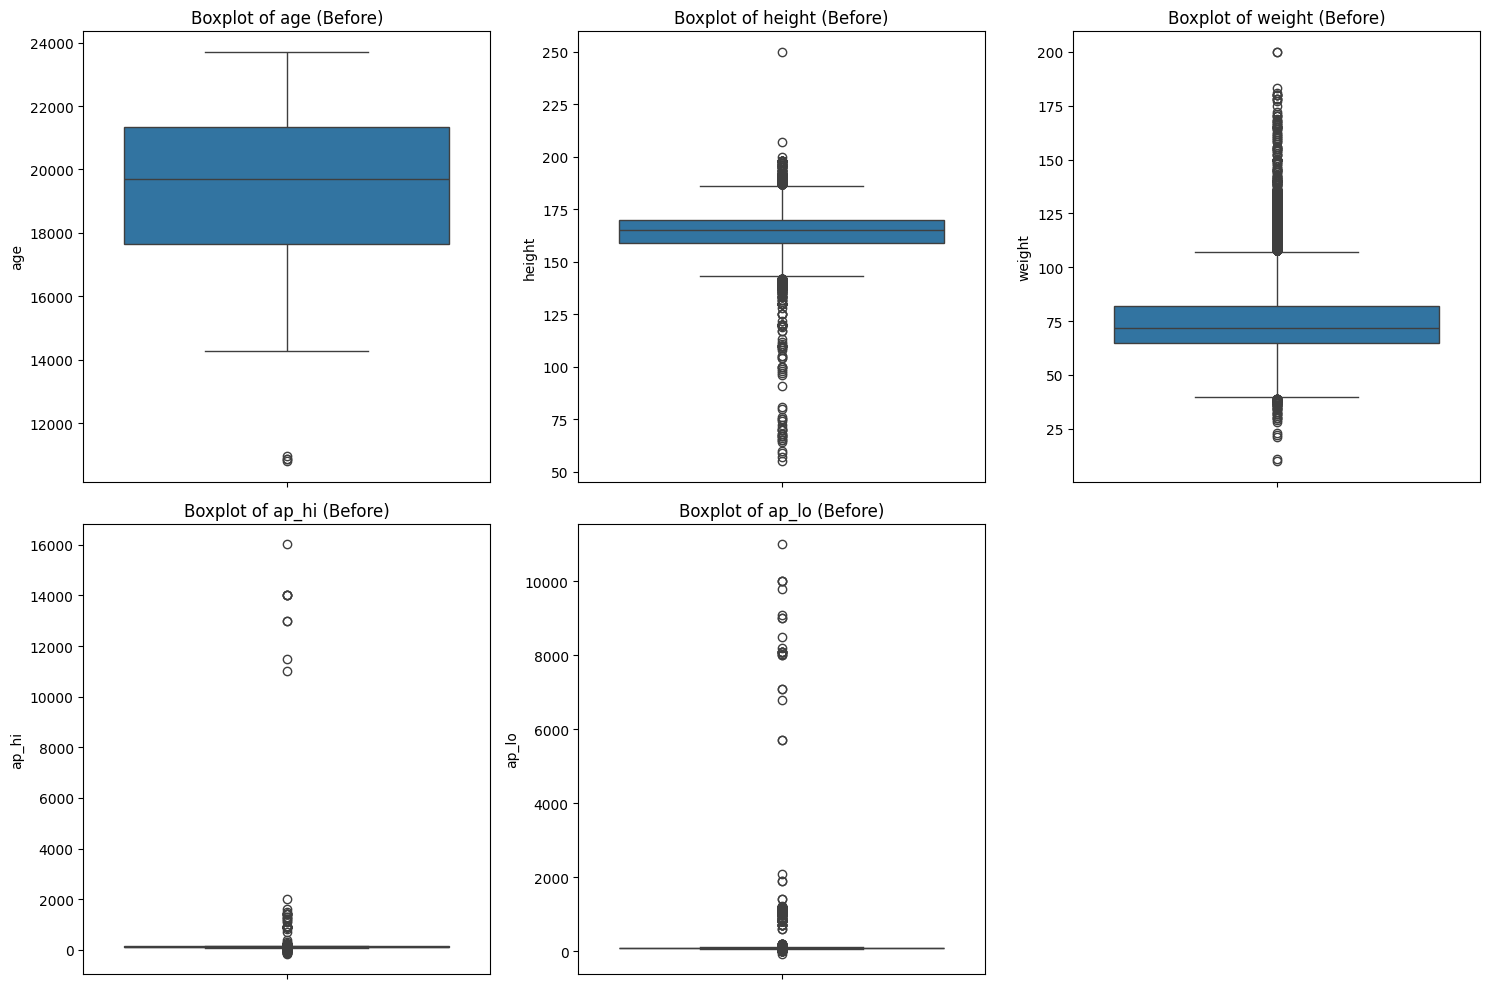

Outliers in age: 4
Outliers in height: 519
Outliers in weight: 1819
Outliers in ap_hi: 1435
Outliers in ap_lo: 4632


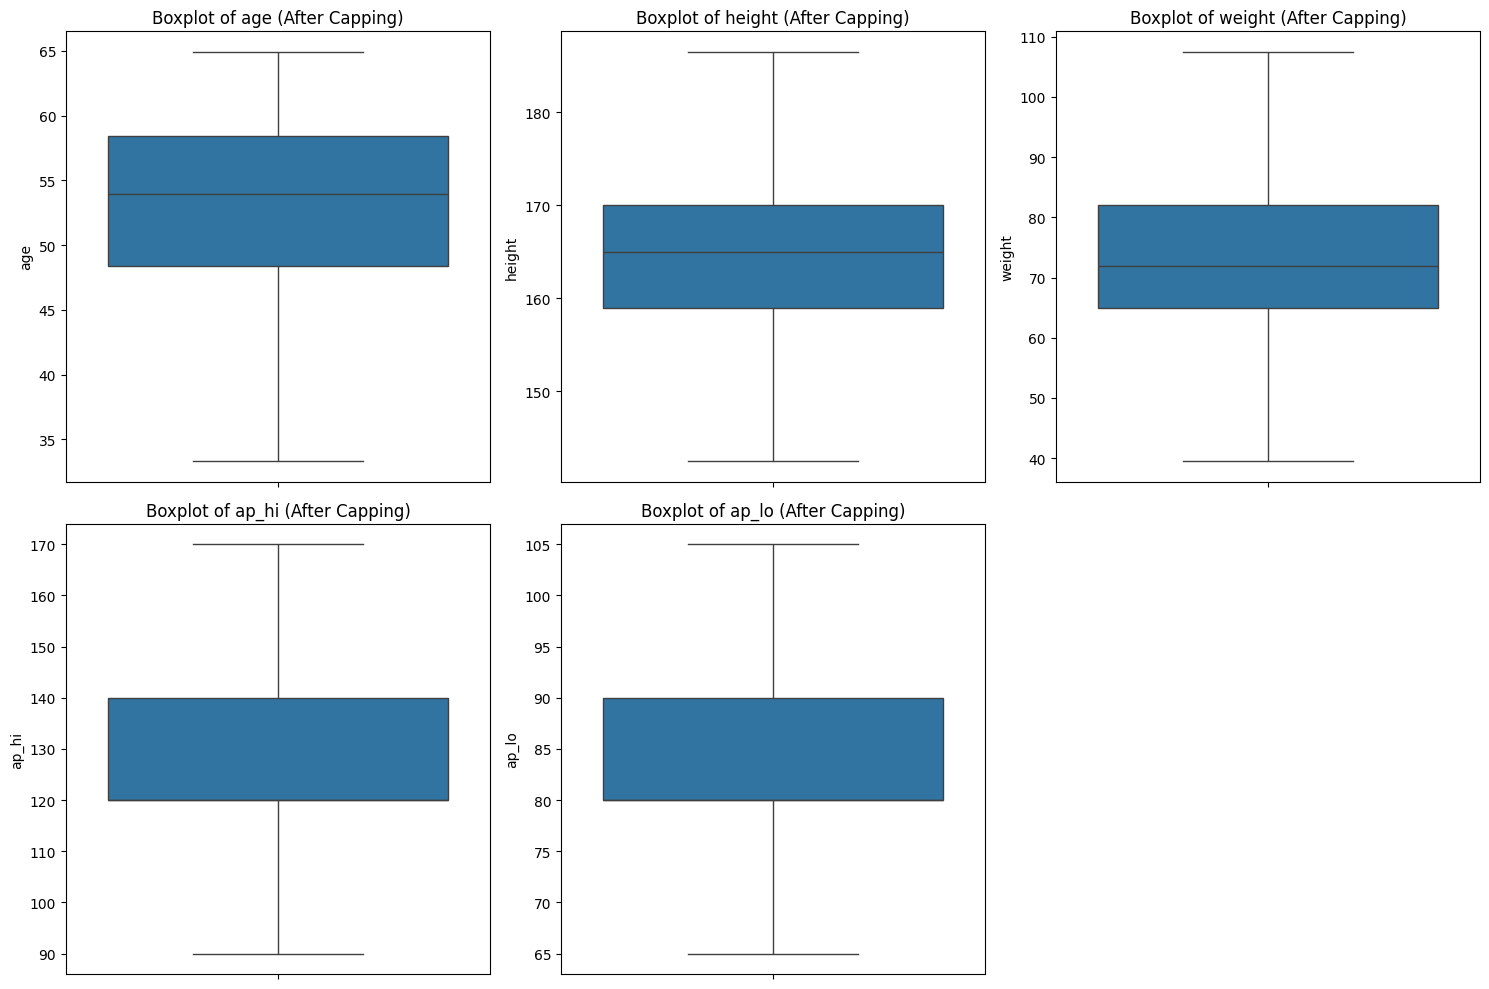

In [76]:
numerical_cols = ['age', 'height', 'weight', 'ap_hi', 'ap_lo']

def detect_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    return outliers, lower_bound, upper_bound

# Visualize before handling
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(y=df[col])
    plt.title(f'Boxplot of {col} (Before)')
plt.tight_layout()
plt.show()

# Count outliers before handling
outlier_counts_before = {}
for col in numerical_cols:
    outliers, _, _ = detect_outliers_iqr(df_processed, col)
    outlier_counts_before[col] = len(outliers)
    print(f"Outliers in {col}: {len(outliers)}")

# Handle outliers by capping on df_processed
for col in numerical_cols:
    _, lower_bound, upper_bound = detect_outliers_iqr(df_processed, col)
    df_processed[col] = np.where(df_processed[col] < lower_bound, lower_bound, df_processed[col])
    df_processed[col] = np.where(df_processed[col] > upper_bound, upper_bound, df_processed[col])

# Visualize after capping
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(y=df_processed[col])
    plt.title(f'Boxplot of {col} (After Capping)')
plt.tight_layout()
plt.show()

# Categorical Encoding

In [77]:
gender_dummies = pd.get_dummies(df_processed['gender'], prefix='Is')
gender_dummies = gender_dummies.rename(columns={'Is_1': 'is_female', 'Is_2': 'is_male'}).astype(int)
df_processed = pd.concat([df_processed.drop('gender', axis=1), gender_dummies], axis=1)

print("New columns added:", list(gender_dummies.columns))

df_processed.head()

New columns added: ['is_female', 'is_male']


,id,age,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,is_female,is_male
0,0,50.36,168.0,62.0,110.0,80.0,1,1,0,0,1,0,0,1
1,1,55.38,156.0,85.0,140.0,90.0,3,1,0,0,1,1,1,0
2,2,51.63,165.0,64.0,130.0,70.0,3,1,0,0,0,1,1,0
3,3,48.25,169.0,82.0,150.0,100.0,1,1,0,0,1,1,0,1
4,4,47.84,156.0,56.0,100.0,65.0,1,1,0,0,0,0,1,0


# Normalization

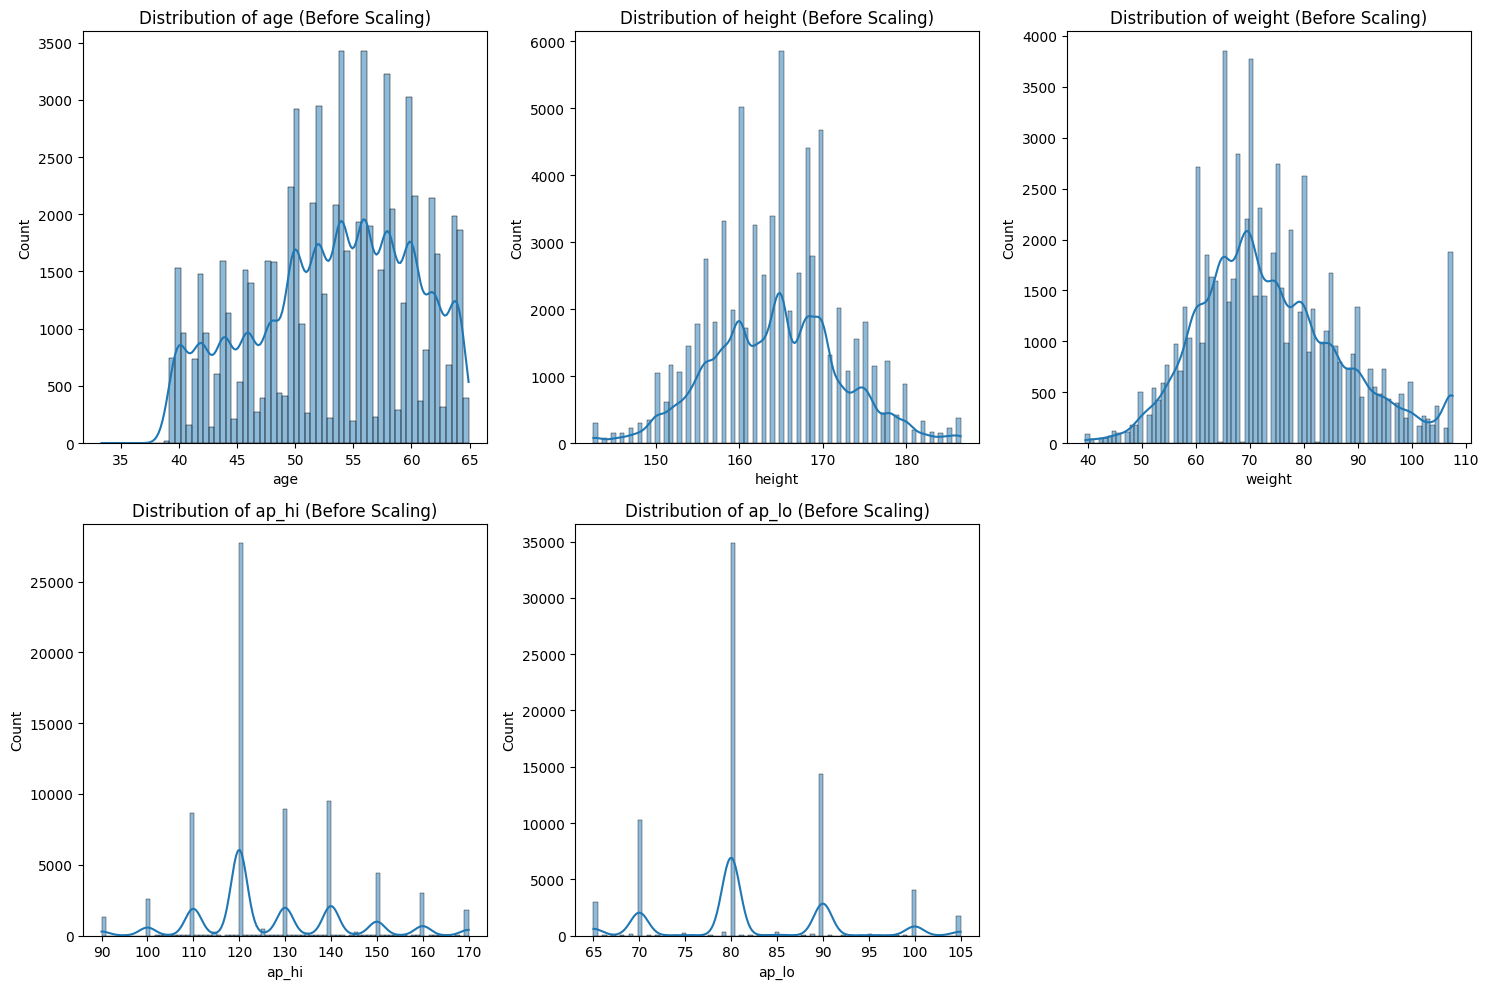

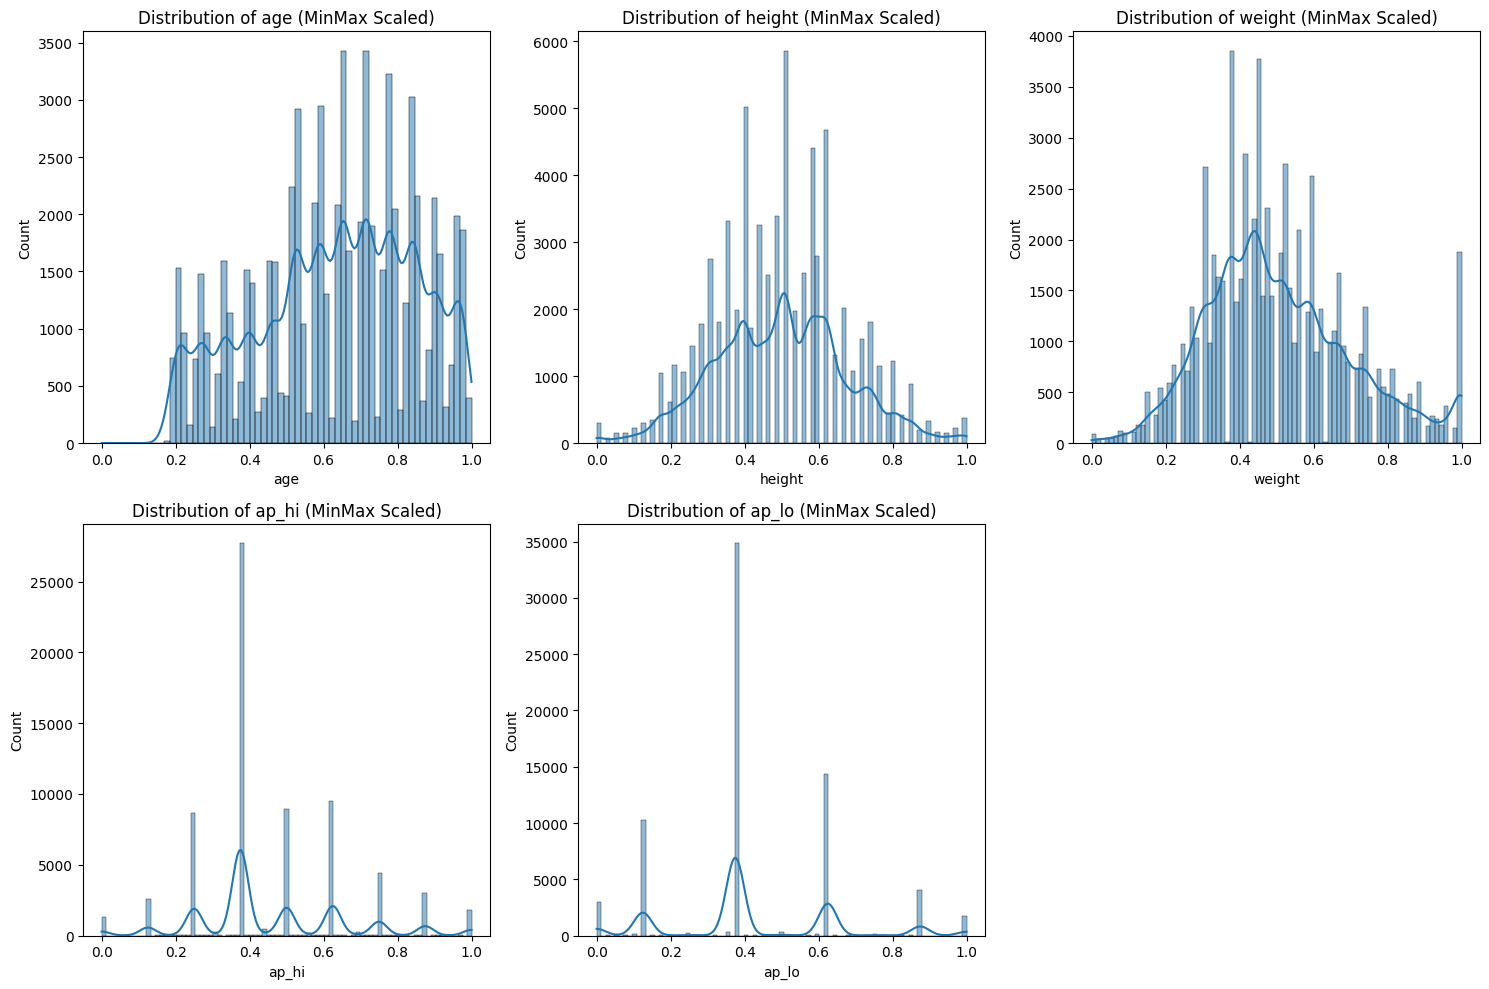

In [78]:
features_to_scale = ['age', 'height', 'weight', 'ap_hi', 'ap_lo']

# Visualize before scaling
plt.figure(figsize=(15, 10))
for i, col in enumerate(features_to_scale, 1):
    plt.subplot(2, 3, i)
    sns.histplot(df_processed[col], kde=True)
    plt.title(f'Distribution of {col} (Before Scaling)')
plt.tight_layout()
plt.show()

# Apply MinMaxScaler
scaler_minmax = MinMaxScaler()
df_processed[features_to_scale] = scaler_minmax.fit_transform(df_processed[features_to_scale])

# Visualize after scaling
plt.figure(figsize=(15, 10))
for i, col in enumerate(features_to_scale, 1):
    plt.subplot(2, 3, i)
    sns.histplot(df_processed[col], kde=True)
    plt.title(f'Distribution of {col} (MinMax Scaled)')
plt.tight_layout()
plt.show()

In [79]:
df_processed.to_csv('cardio_train_processed.csv', index=False)

# Split the training data

In [80]:
preprocessed_data = pd.read_csv('cardio_train_processed.csv')

X = preprocessed_data.drop('id', axis=1)
print(X.head(), '\n')
Y = preprocessed_data['id']

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

print('Training data shape:', x_train.shape)
print('Testing data shape:', x_test.shape)

        age    height    weight  ap_hi  ap_lo  cholesterol  gluc  smoke  alco  \
0  0.539313  0.579545  0.330882  0.250  0.375            1     1      0     0   
1  0.698149  0.306818  0.669118  0.625  0.625            3     1      0     0   
2  0.579497  0.511364  0.360294  0.500  0.125            3     1      0     0   
3  0.472552  0.602273  0.625000  0.750  0.875            1     1      0     0   
4  0.459579  0.306818  0.242647  0.125  0.000            1     1      0     0   

   active  cardio  is_female  is_male  
0       1       0          0        1  
1       1       1          1        0  
2       0       1          1        0  
3       1       1          0        1  
4       0       0          1        0   

Training data shape: (56000, 13)
Testing data shape: (14000, 13)
